## House Price Prediction - Advance Regression Assignment

### Problem Statement - Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Import Libraries

In [82]:

import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os


import warnings
warnings.filterwarnings('ignore')

### Reading and understanding Data set

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
perc_null = round(100*(housing.isnull().sum()/len(housing.index)), 2)
perc_null.sort_values(inplace = True, ascending = False)
perc_null.head(25)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
dtype: float64

In [8]:
housing.columns[housing.isnull().any()] 

null = housing.isnull().sum()/len(housing)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

According to data dictionary Null in following columns means absence absence of facility which may affect the price <br>
so instead of removing the rows we will impute the categorical values

#### Data Cleaning

In [9]:
null_with_values = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_values:
    housing[i].fillna("none", inplace=True)

In [10]:
null_with_values

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
# Check null values now once again

housing.columns[housing.isnull().any()] 

null_2 = housing.isnull().sum()/len(housing)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [12]:
print(f"""
LotFrontage - \n{housing["LotFrontage"].describe()}\n
GarageYrBlt - \n{housing["GarageYrBlt"].describe()}\n
MasVnrArea - \n{housing["MasVnrArea"].describe()}\n
Electrical - \n{housing["Electrical"].describe()}\n
""")


LotFrontage - 
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

GarageYrBlt - 
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

MasVnrArea - 
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Electrical - 
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object




In [13]:
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace = True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace = True)
housing["Electrical"].dropna(inplace = True)

In [14]:
print(f"""
LotFrontage - \n{housing["LotFrontage"].describe()}\n
GarageYrBlt - \n{housing["GarageYrBlt"].describe()}\n
MasVnrArea - \n{housing["MasVnrArea"].describe()}\n
Electrical - \n{housing["Electrical"].describe()}\n
""")


LotFrontage - 
count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

GarageYrBlt - 
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

MasVnrArea - 
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

Electrical - 
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object




In [15]:
len(housing.index)

1460

#### Visualising Data

In [16]:
housing_numeric = housing.select_dtypes(include = ["float64", "int64"])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Dropping ID column as this is not useful here

In [17]:
housing_numeric.drop("Id", axis =1, inplace = True)
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

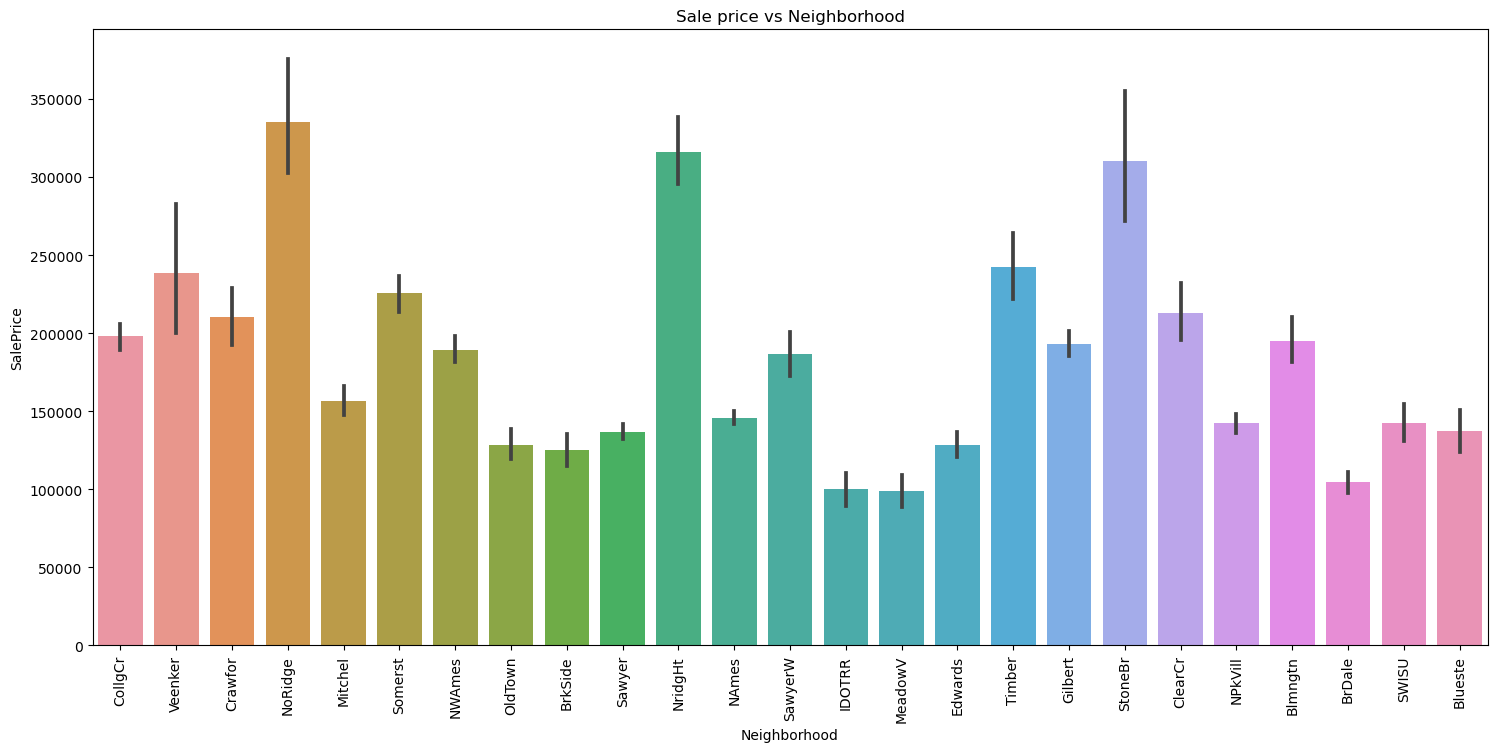

In [18]:
# Neighborhood vs Sale Price

plt.figure(figsize = (18,8))
sns.barplot(x = "Neighborhood", y = "SalePrice", data = housing)
plt.title("Sale price vs Neighborhood")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

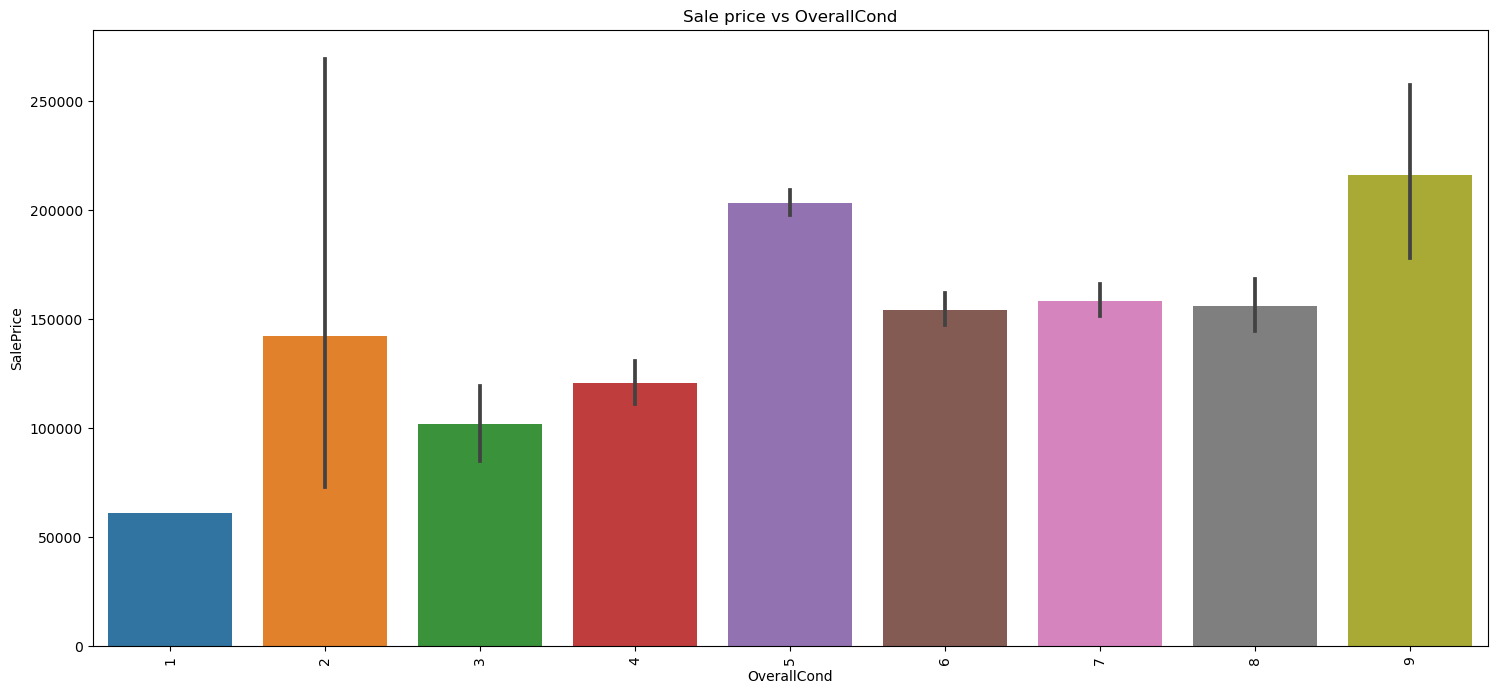

In [19]:
# OverallCond vs Sale Price

plt.figure(figsize = (18,8))
sns.barplot(x = "OverallCond", y = "SalePrice", data = housing)
plt.title("Sale price vs OverallCond")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

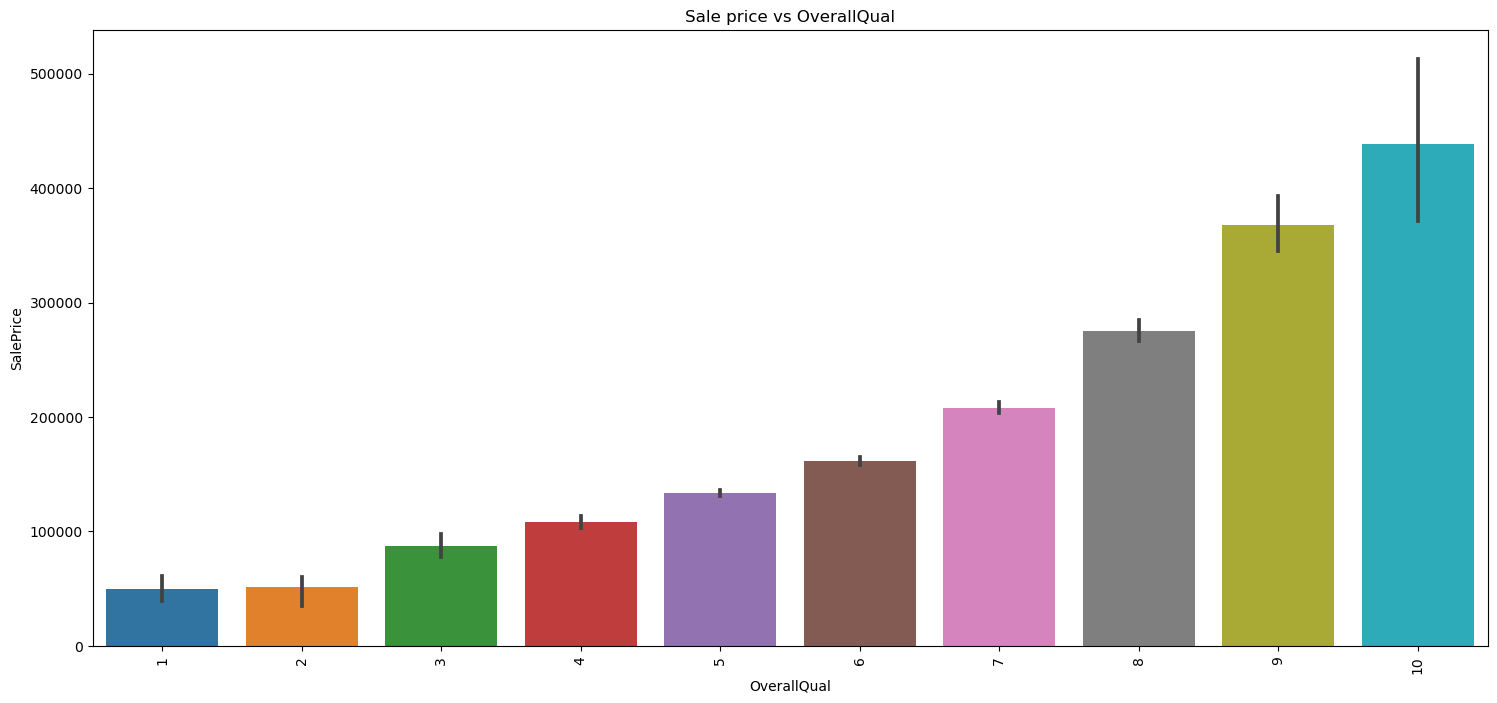

In [20]:
# OverallQual vs Sale Price

plt.figure(figsize = (18,8))
sns.barplot(x = "OverallQual", y = "SalePrice", data = housing)
plt.title("Sale price vs OverallQual")
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

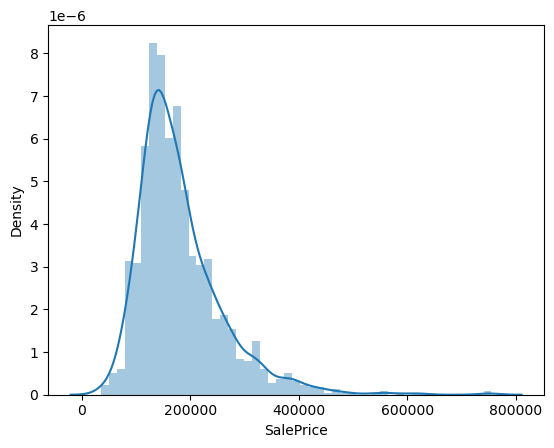

In [21]:
sns.distplot(housing["SalePrice"])

Since the Salesprice data is skewed left side, we will apply log transformation to obtain centralized data

In [22]:
housing["SalePrice"] = np.log1p(housing["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

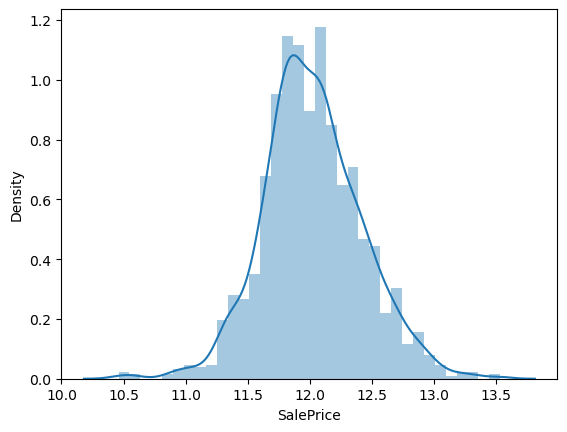

In [23]:
sns.distplot(housing["SalePrice"])

<AxesSubplot:>

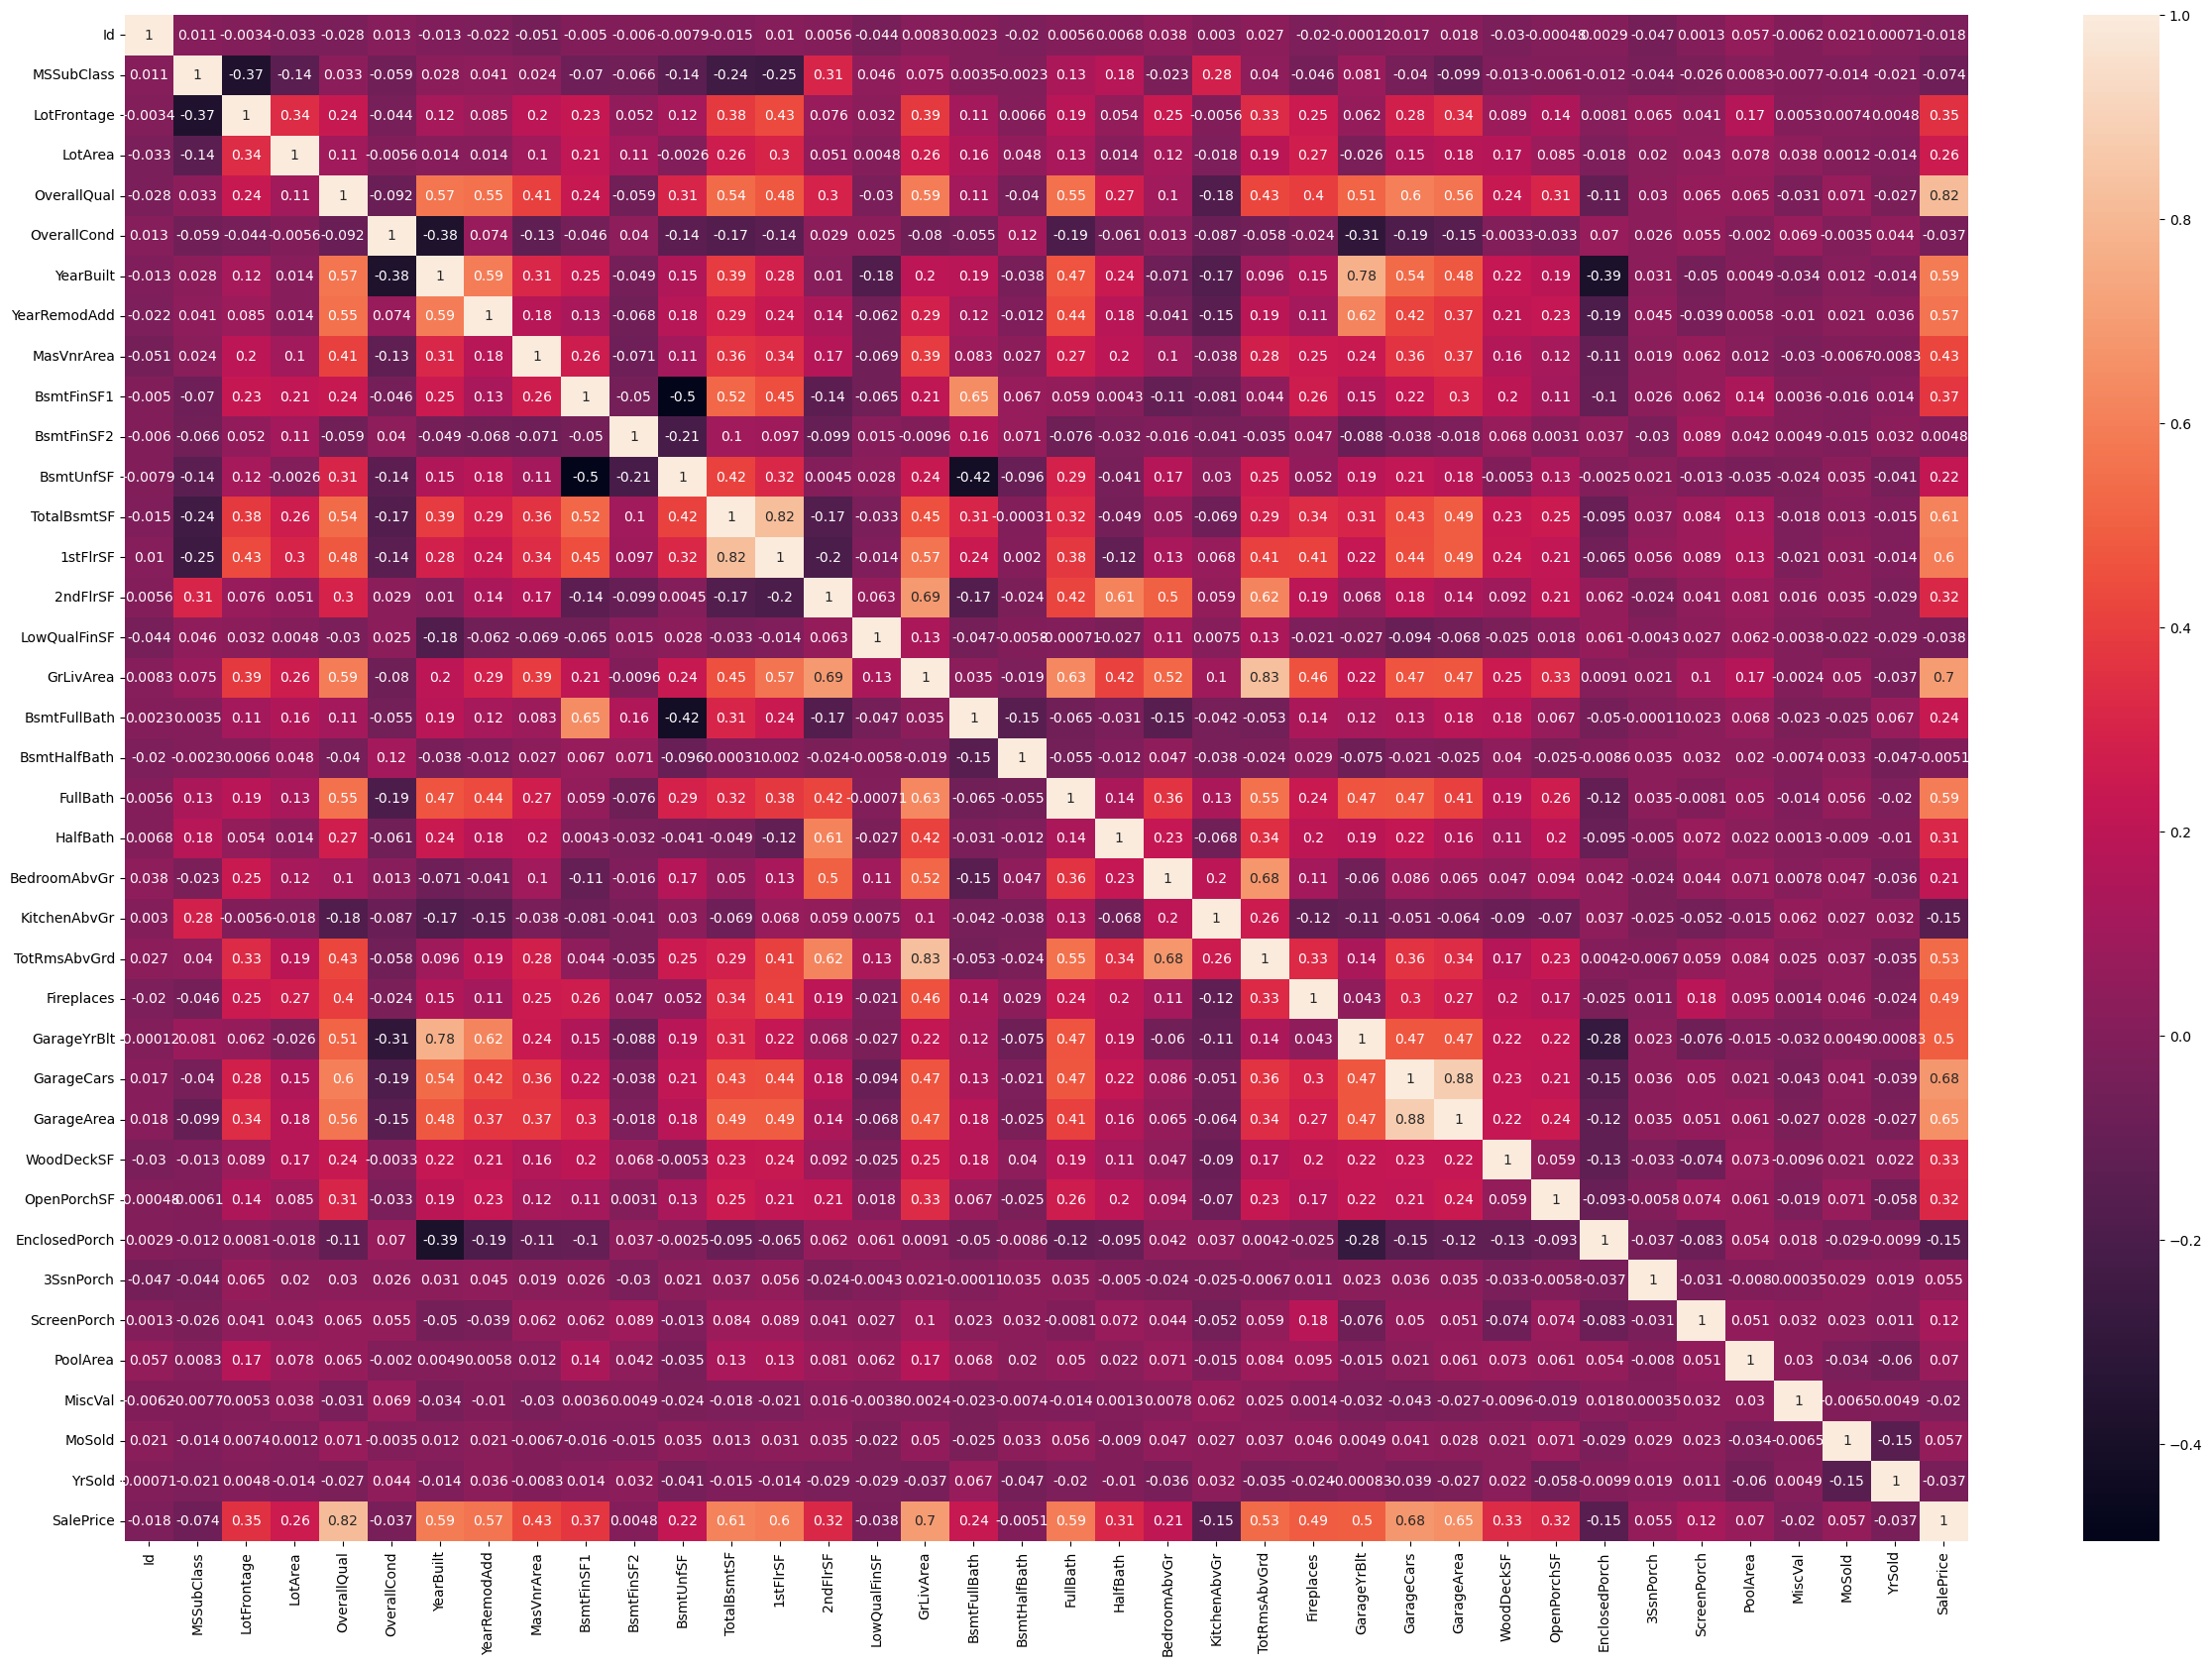

In [24]:
# making Correlation heatmap of housing data
plt.figure(figsize = (30, 20))
sns.heatmap(housing.corr(), annot= True)

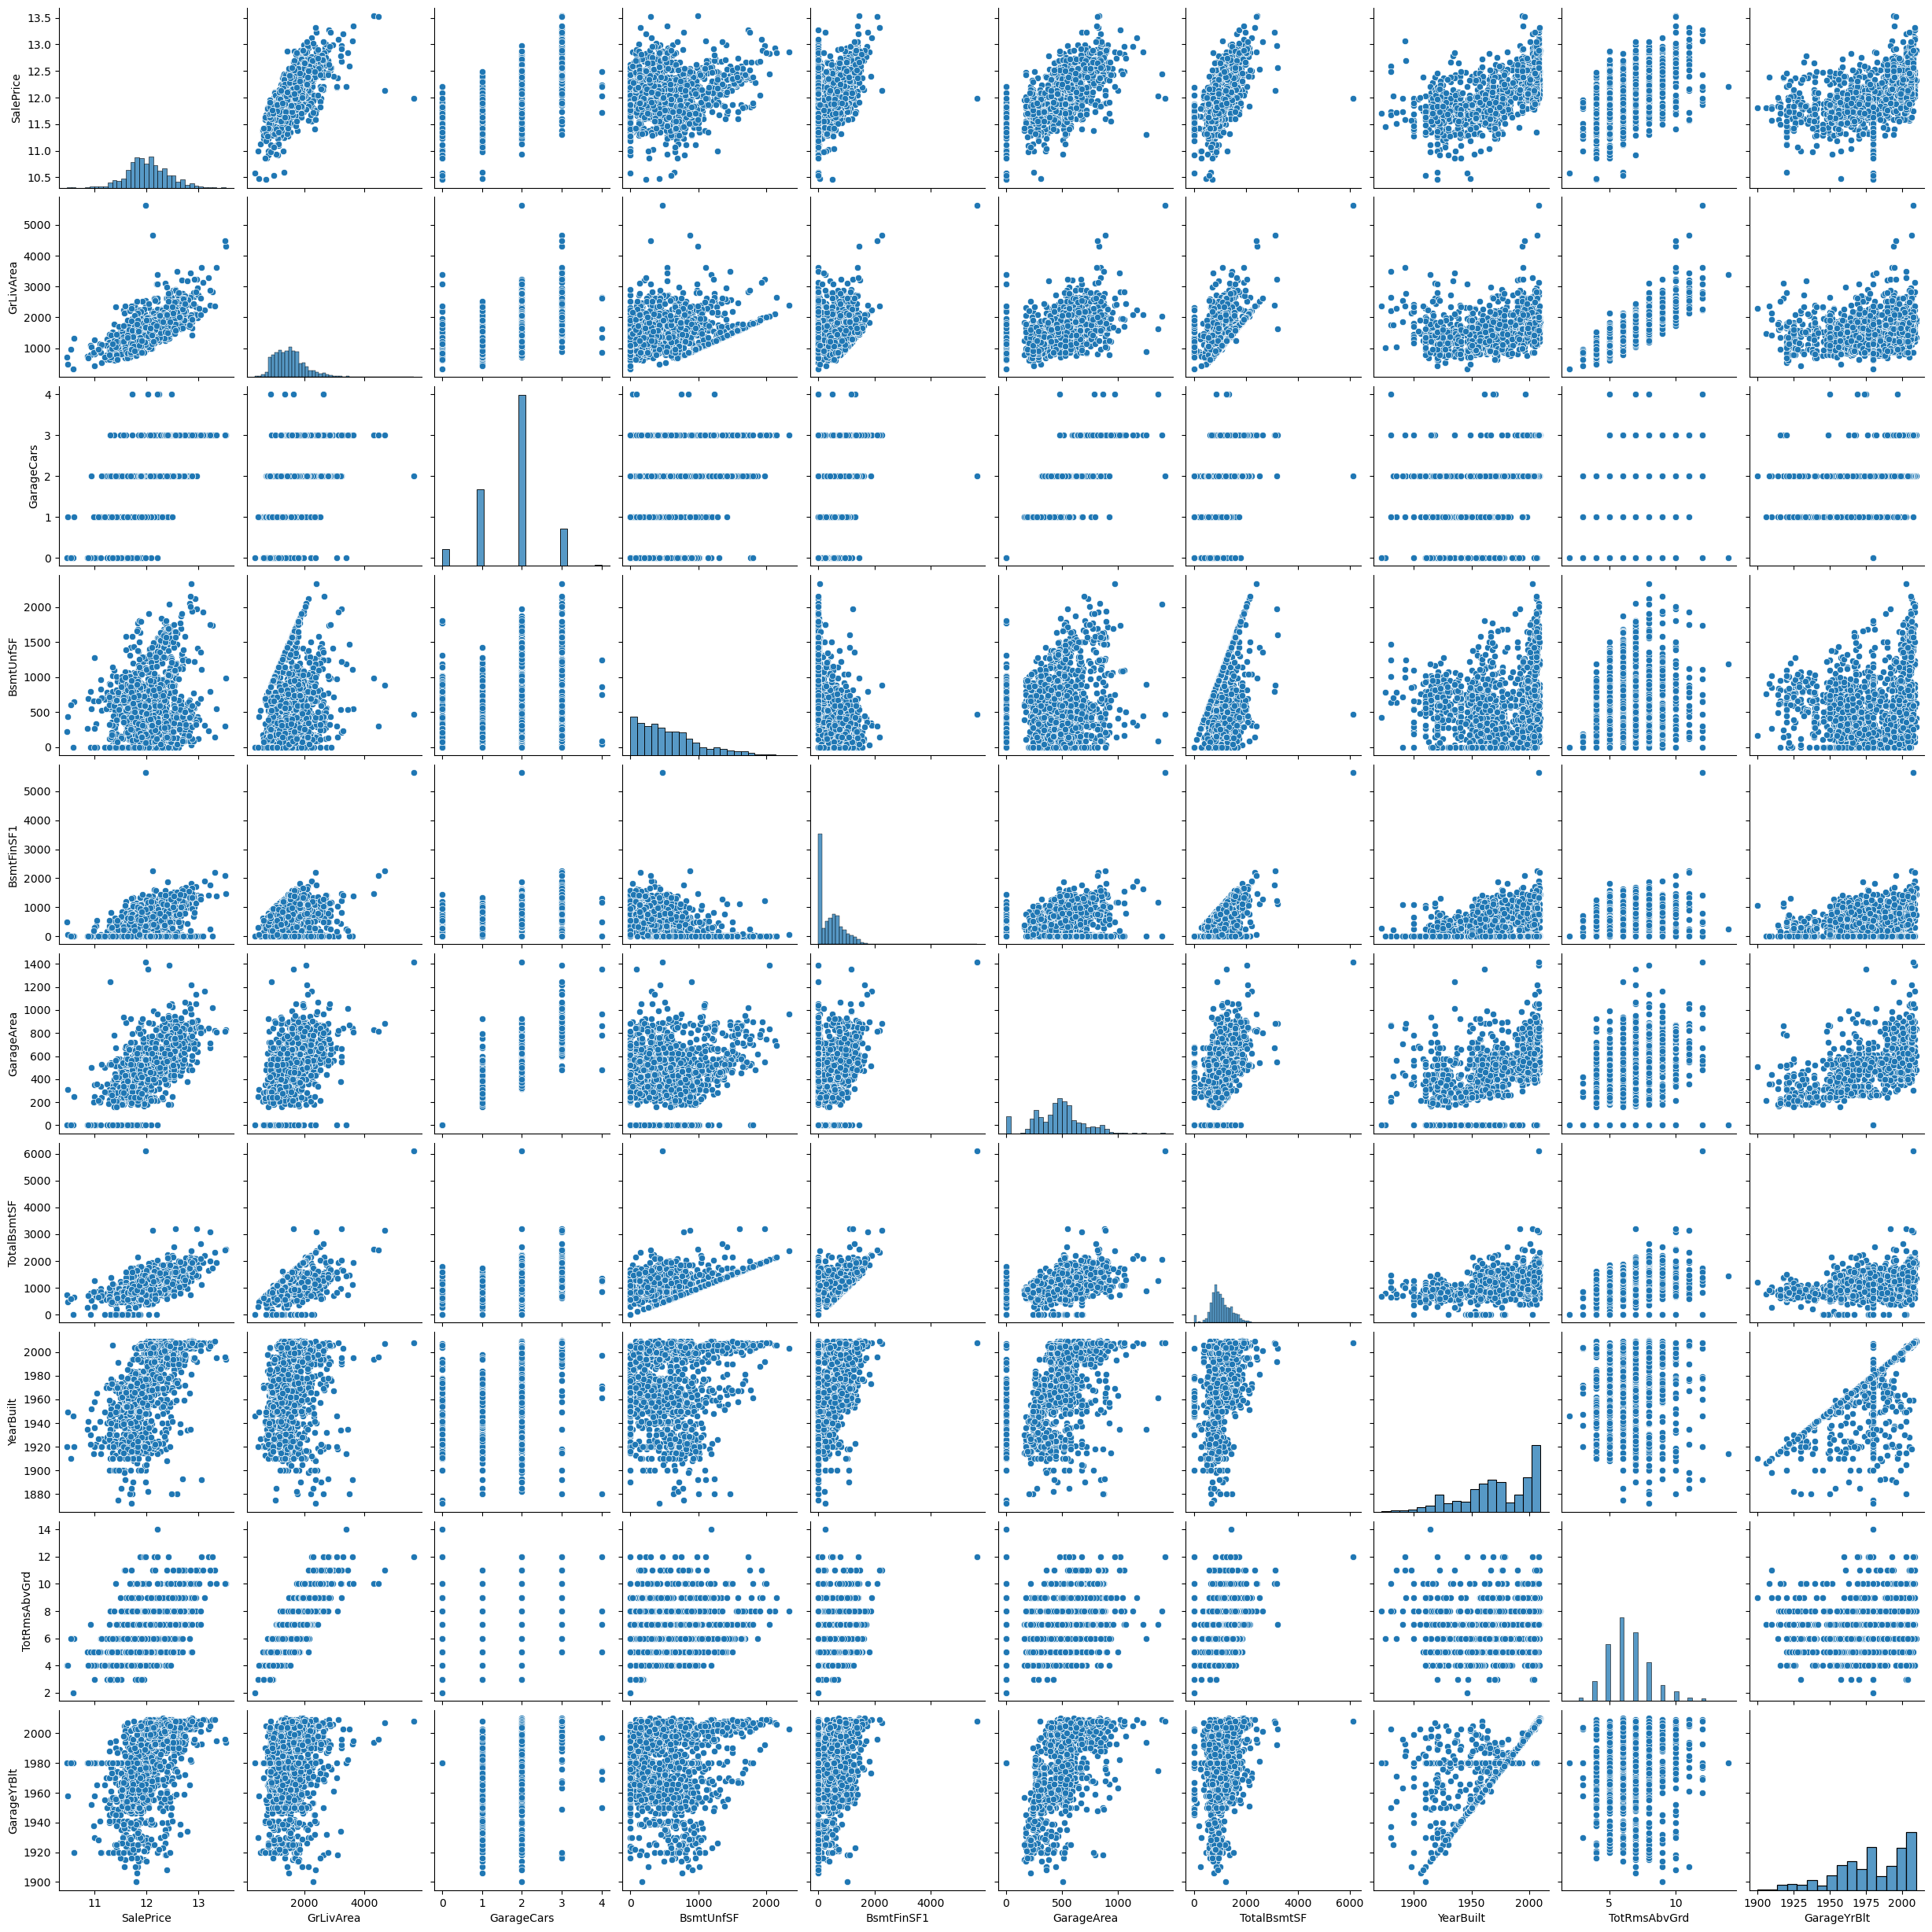

In [25]:
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing[cols], size = 2.5)
plt.show()

In [26]:
housing.drop(["GarageCars", "BsmtUnfSF", "TotRmsAbvGrd", "GarageYrBlt"], axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [27]:
housing.select_dtypes(exclude = "object")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


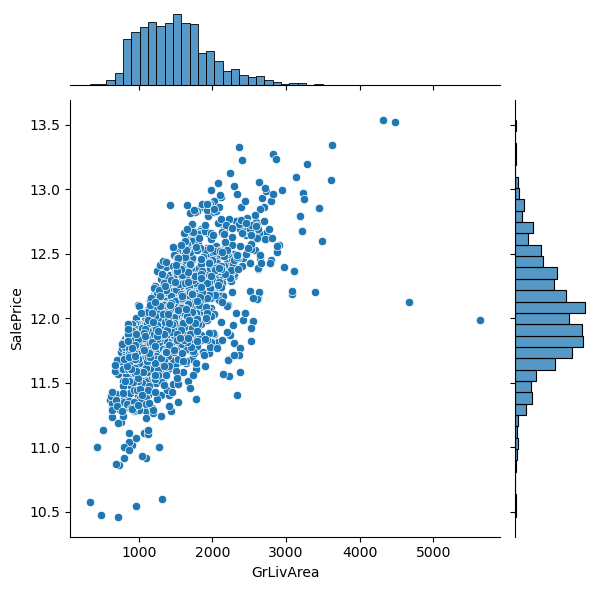

In [32]:
# Analysing nmeric columns
sns.jointplot(x= housing["GrLivArea"], y = housing["SalePrice"])
plt.show()

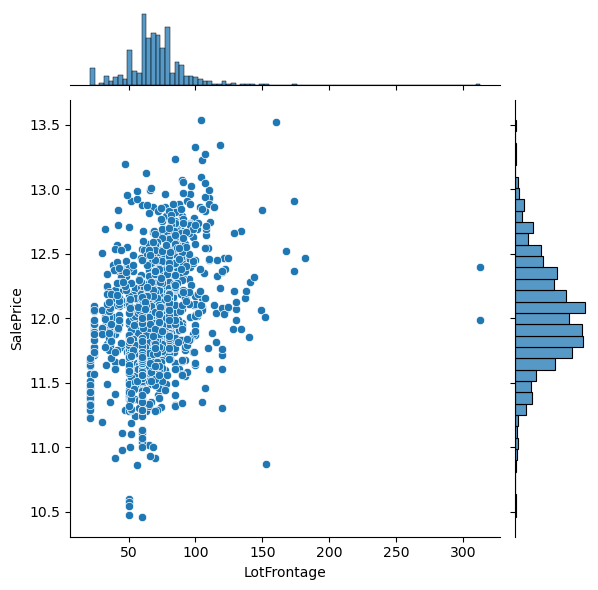

In [34]:
sns.jointplot(x = housing['LotFrontage'], y = housing['SalePrice'])
plt.show()

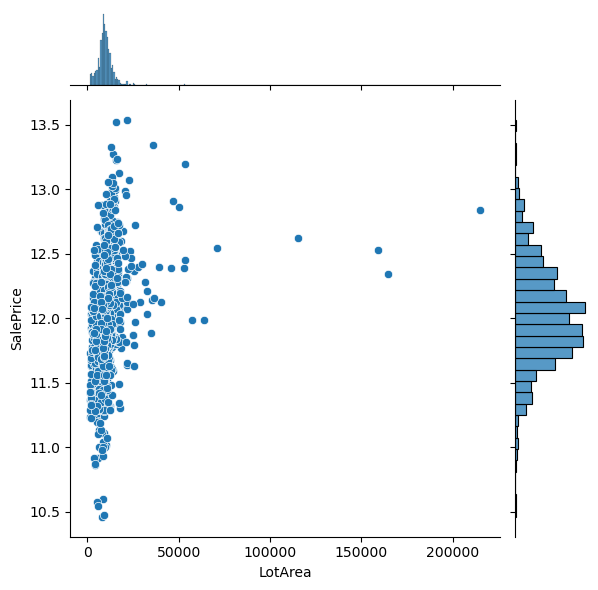

In [35]:
sns.jointplot(x = housing['LotArea'], y = housing['SalePrice'])
plt.show()

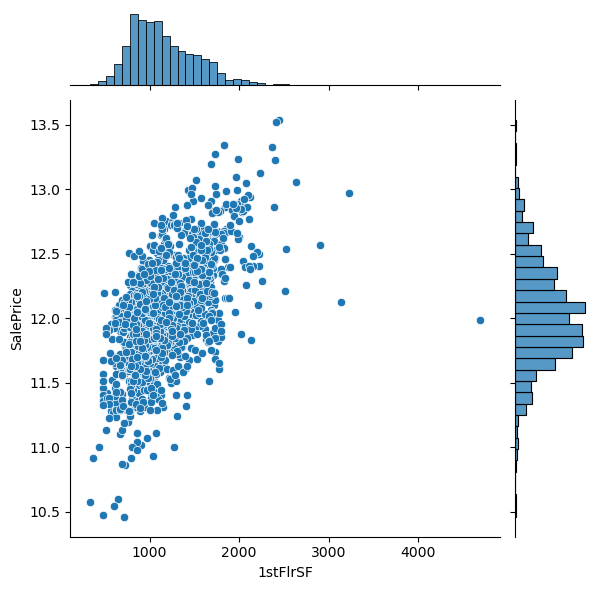

In [36]:
sns.jointplot(x = housing['1stFlrSF'], y = housing['SalePrice'])
plt.show()

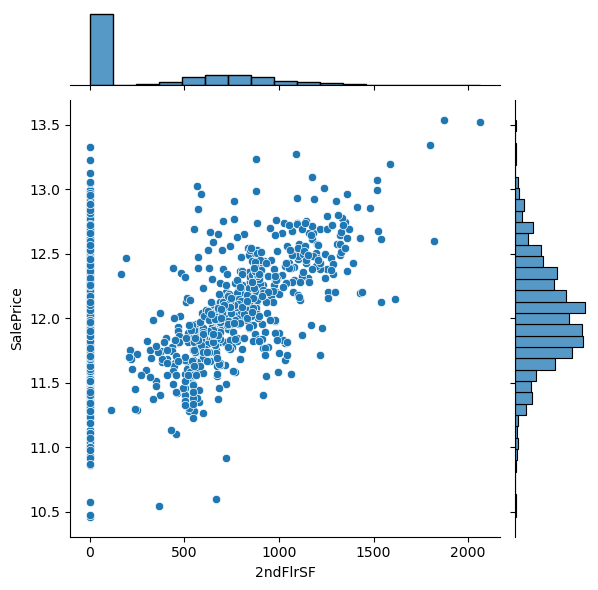

In [37]:
sns.jointplot(x = housing['2ndFlrSF'], y = housing['SalePrice'])
plt.show()

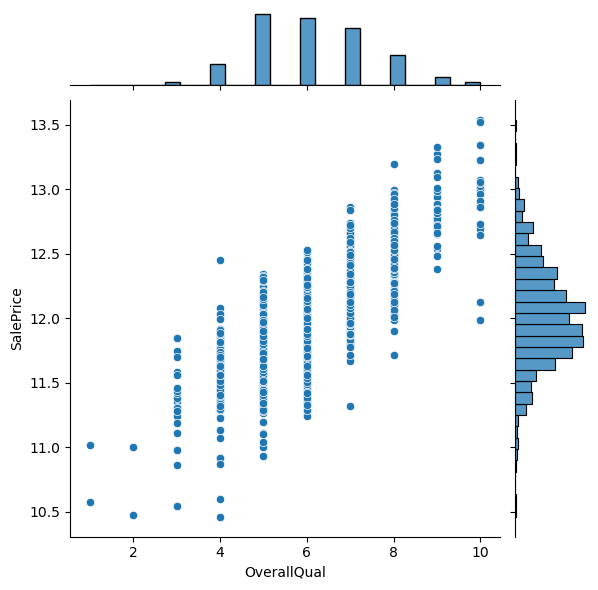

In [38]:
sns.jointplot(x = housing['OverallQual'], y = housing['SalePrice'])
plt.show()

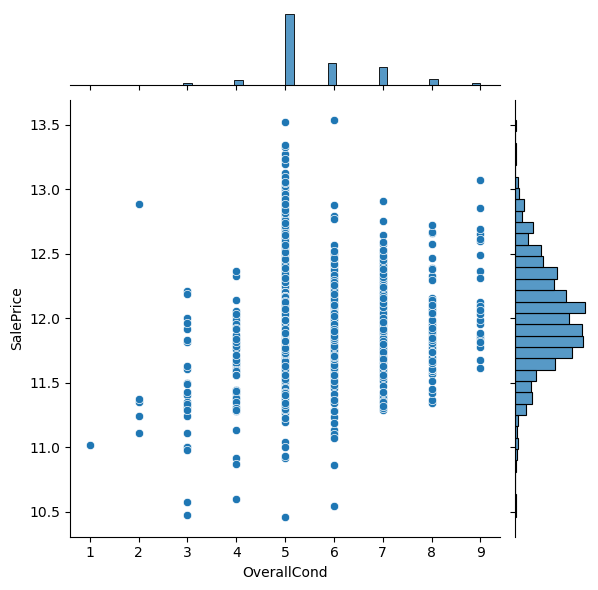

In [39]:
sns.jointplot(x=housing['OverallCond'], y = housing['SalePrice'])
plt.show()

In [40]:
# PropAge -  Property Age from yearsold - yearbuilt
housing['PropAge'] = (housing['YrSold'] - housing['YearBuilt'])
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


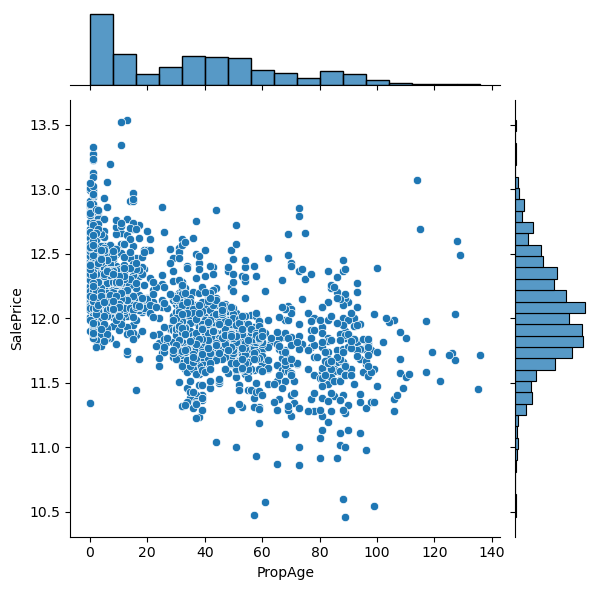

In [41]:
# PropAge vs SalePrice
sns.jointplot(x = housing['PropAge'], y = housing['SalePrice'])
plt.show()

In [42]:
housing = housing.drop(['MoSold'], axis = 1)
housing = housing.drop(['YrSold'], axis = 1)
housing = housing.drop(['YearBuilt'], axis = 1)
housing = housing.drop(['YearRemodAdd'], axis = 1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [43]:
housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [44]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [45]:
# We can also drop columns that show very low variance and thus not required for predictions
housing = housing.drop(['Street'], axis = 1)
housing = housing.drop(['Utilities'], axis = 1)

In [46]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= housing.select_dtypes(include=['float64', 'int64'])
l2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,642,0,35,272,0,0,0,0,11.849405,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,1457,20,85.0,13175,6,6,119.0,790,163,1542,...,500,349,0,0,0,0,0,0,12.254868,32
1457,1458,70,66.0,9042,7,9,0.0,275,0,1152,...,252,0,60,0,0,0,0,2500,12.493133,69
1458,1459,20,68.0,9717,5,6,0.0,49,1029,1078,...,240,366,0,112,0,0,0,0,11.864469,60


In [47]:
for i in l2:
    print(housing[i].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
137.0      1
140.0      1
38.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 115, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0.0      869
180.0      8
72.0       8
108.0      

These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

In [48]:
 housing = housing.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

#### Data Preparation

In [49]:
# Drop 'Id' from Dataframe

housing = housing.drop(['Id'], axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429220,8


In [50]:
#type of each feature in data: int, float, object
types = housing.dtypes

#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 

#categorical values are type object
categorical_type = types[types == object]

In [51]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [52]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [53]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Creating Dummy columns to convert categorical into numerical

In [55]:
housing = pd.get_dummies(housing, drop_first=True )
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [56]:
X = housing.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# Putting response variable to y
y = housing['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [58]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [59]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [64]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,...,0,0,1,0,0,0,0,0,0,1


In [65]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,...,0,0,0,0,1,0,0,0,1,0
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,...,0,0,0,0,1,0,0,0,0,0
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,...,0,0,0,0,1,0,0,0,1,0
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,...,0,0,0,0,1,0,0,0,1,0
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,...,0,0,0,0,1,0,0,0,1,0


### Model Building and Evaluation

Lets first chemck the model using Linear Regression and RFE (OPTIONAL)

In [68]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [73]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [74]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 74),
 ('LotFrontage', False, 71),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 81),
 ('BsmtFinSF1', False, 30),
 ('BsmtFinSF2', False, 102),
 ('TotalBsmtSF', False, 80),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 33),
 ('HalfBath', False, 42),
 ('BedroomAbvGr', False, 56),
 ('KitchenAbvGr', False, 59),
 ('Fireplaces', False, 57),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 60),
 ('PoolArea', False, 44),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 34),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 75),
 ('LandContour_HLS', True, 1),
 ('

In [75]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [76]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_TenC',
       'MiscFeature_none', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=106)

In [77]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [78]:
X_train_rfe = pd.DataFrame(X_train[col])

In [79]:
X_train_rfe.head()

,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PropAge,MSZoning_FV,MSZoning_RH,...,MiscFeature_Othr,MiscFeature_Shed,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,-0.059996,1.252715,2.572160,-0.797551,-0.121406,1.229791,0.478002,0.660066,0,0,...,0,0,0,0,0,0,0,0,1,0
1408,-1.501313,1.252715,-1.069794,0.630928,-0.121406,-0.279140,0.256615,2.066739,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0.660663,1.252715,-1.504156,0.440311,-0.121406,-0.757443,-0.850325,1.477899,0,0,...,0,0,0,0,0,0,0,0,1,0
861,-0.780655,-1.406374,-0.303879,-0.797551,-0.121406,-0.894101,0.145921,0.267506,0,0,...,0,0,0,0,0,0,0,0,1,0
220,0.660663,-0.520011,0.875837,-0.797551,-0.121406,-0.022906,0.934615,-1.204594,0,0,...,0,0,0,0,1,0,0,0,0,1


In [80]:
X_train_rfe.shape

(1021, 105)

In [83]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9046983032180951

In [94]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.8883478238214207e+22

Since the Test R2 is too low, we will check for some alternate methods of Regression

In [95]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 74),
 ('LotFrontage', False, 71),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 81),
 ('BsmtFinSF1', False, 30),
 ('BsmtFinSF2', False, 102),
 ('TotalBsmtSF', False, 80),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 33),
 ('HalfBath', False, 42),
 ('BedroomAbvGr', False, 56),
 ('KitchenAbvGr', False, 59),
 ('Fireplaces', False, 57),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 60),
 ('PoolArea', False, 44),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 34),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 75),
 ('LandContour_HLS', True, 1),
 ('

In [96]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [97]:

X_test_rfe = X_test[col1]

In [98]:

X_test_rfe.head()

,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandContour_HLS,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior1st_Stucco,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,...,MasVnrType_Stone,MasVnrType_none,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Slab,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_LwQ,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_none,MiscFeature_Othr,MiscFeature_Shed,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
930,1.358461,-0.509551,0.771223,-0.791130,-0.119344,-0.117457,0.657098,-1.150291,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
530,-0.099887,-0.509551,0.884656,-0.791130,-0.119344,-0.035051,0.608692,-0.539797,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1291,-0.829061,1.350309,-1.434127,0.740428,-0.119344,-0.431748,-1.017758,0.036781,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1385,-1.558235,2.280239,-0.996222,0.024789,-0.119344,-0.715377,-1.133933,1.766516,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
305,1.358461,-0.509551,2.179903,-0.791130,-0.119344,0.905907,2.002793,-1.116375,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

#### Lasso Regression

In [99]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 211)
y_train (1021,)


In [100]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078068,0.027339,0.004000,0.005896,0.0001,{'alpha': 0.0001},-0.100989,-0.083220,-0.102290,-0.103835,-0.095407,-0.097148,0.007522,2,-0.071989,-0.077612,-0.073123,-0.064545,-0.072716,-0.071997,0.004215
1,0.018824,0.008873,0.002519,0.003997,0.001,{'alpha': 0.001},-0.091092,-0.084726,-0.097318,-0.103484,-0.085320,-0.092388,0.007180,1,-0.081975,-0.085052,-0.081050,-0.074057,-0.082346,-0.080896,0.003670
2,0.008163,0.003174,0.002022,0.003135,0.01,{'alpha': 0.01},-0.104529,-0.098994,-0.100960,-0.112343,-0.091647,-0.101695,0.006785,3,-0.099932,-0.102590,-0.098948,-0.088297,-0.101095,-0.098172,0.005085
3,0.008640,0.003565,0.002640,0.002983,0.05,{'alpha': 0.05},-0.137308,-0.122383,-0.132828,-0.139735,-0.116828,-0.129816,0.008804,4,-0.130587,-0.133071,-0.129419,-0.119567,-0.132747,-0.129078,0.004945
4,0.007895,0.002115,0.003198,0.000980,0.1,{'alpha': 0.1},-0.168374,-0.146599,-0.166323,-0.180801,-0.148573,-0.162134,0.012886,5,-0.162902,-0.163147,-0.160035,-0.157388,-0.164734,-0.161641,0.002611


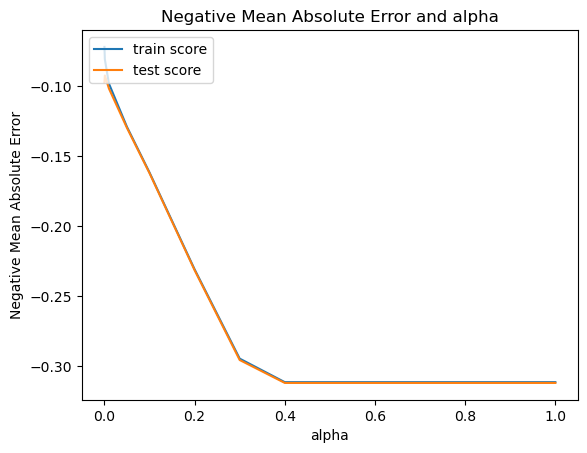

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.


In [103]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.0184681 ,  0.        ,  0.01472643,  0.13153086,  0.04861805,
        0.        ,  0.00642856,  0.        ,  0.01708592,  0.00568986,
        0.        , -0.        ,  0.11748452,  0.02913439,  0.        ,
        0.02153861,  0.0018641 ,  0.        , -0.00573717,  0.02609706,
        0.04518928,  0.00852857,  0.        ,  0.        ,  0.        ,
        0.00787916, -0.01974315, -0.0898249 ,  0.        ,  0.        ,
        0.00991454, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [104]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3

In [105]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8611514145366682
0.8503345015827726


In [106]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15372680389689153


The R2 values for Train and Test matches well, indicating an optimum model

In [107]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [108]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.011
1,MSSubClass,-0.018
2,LotFrontage,0.000
3,LotArea,0.015
4,OverallQual,0.132


In [109]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
...,...,...
86,HouseStyle_SFoyer,-0.000
19,KitchenAbvGr,-0.006
1,MSSubClass,-0.018
27,PoolArea,-0.020


In [110]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
14,BsmtFullBath,0.029
20,Fireplaces,0.026
16,FullBath,0.022
9,TotalBsmtSF,0.017
3,LotArea,0.015


In [111]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(20, 2)

In [112]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']


In [113]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
175,1.229791,-0.059996,1.252715,0.347365,0.478002,0.085426,0.622339,0.166080,0.612765,1.105326,0,-0.261563,0.786946,-0.260661,-0.740805
1408,-0.279140,-1.501313,1.252715,-0.973680,0.256615,-0.943351,-0.935034,-0.261043,-0.432534,-0.807450,0,-0.721923,-1.006519,3.016768,-0.740805
1148,-0.757443,0.660663,1.252715,-1.087563,-0.850325,-0.943351,0.622339,-0.439778,-0.432534,-0.807450,1,-0.721923,-1.006519,-0.260661,-0.740805
861,-0.894101,-0.780655,-1.406374,-0.023894,0.145921,0.870488,-0.935034,0.079341,0.220778,1.105326,1,-0.721923,-1.006519,-0.260661,-0.740805
220,-0.022906,0.660663,-0.520011,1.021554,0.934615,-0.943351,-0.935034,-0.151525,0.133670,-0.807450,1,-0.198065,0.786946,-0.260661,2.124358


In [114]:

X_train_lasso.shape

(1021, 15)

In [115]:

(1000, 15)
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
930,-0.117457,1.358461,-0.509551,0.899165,0.657098,-1.009468,-0.987888,-0.211538,0.106932,-0.851855,1,-0.427207,0.798671,-0.293788,-0.019795
530,-0.035051,-0.099887,-0.509551,0.887692,0.608692,0.743814,0.551952,0.029981,0.676372,1.111895,0,-0.673305,0.798671,-0.293788,0.924930
1291,-0.431748,-0.829061,1.350309,-1.019124,-1.017758,-0.518001,-0.987888,-1.583933,-2.360638,-0.851855,0,-0.673305,0.798671,-0.293788,0.627799
1385,-0.715377,-1.558235,2.280239,-0.638220,-1.133933,0.634091,-0.987888,-0.872447,-1.459026,1.111895,0,0.639219,-1.072013,-0.293788,-0.781670
305,0.905907,1.358461,-0.509551,2.124484,2.002793,2.300508,-0.987888,0.065215,0.439105,1.111895,1,-0.673305,0.798671,-0.293788,0.498280


#### Ridge Regression

In [116]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009739,0.004251,0.002367,0.000452,0.0001,{'alpha': 0.0001},-0.113055,-0.088533,-0.110225,-0.107806,-0.102843,-0.104492,0.008655,27,-0.070227,-0.075506,-0.071683,-0.062232,-0.071465,-0.070223,0.004369
1,0.006878,0.005009,0.001797,0.001467,0.001,{'alpha': 0.001},-0.113022,-0.088506,-0.110190,-0.107788,-0.102778,-0.104457,0.008655,26,-0.070228,-0.075508,-0.071683,-0.062234,-0.071469,-0.070225,0.004369
2,0.006098,0.005047,0.002076,0.003323,0.01,{'alpha': 0.01},-0.112709,-0.088264,-0.109847,-0.107626,-0.102208,-0.104131,0.008648,25,-0.070240,-0.075533,-0.071682,-0.062255,-0.071509,-0.070244,0.004370
3,0.008143,0.001105,0.004404,0.003069,0.05,{'alpha': 0.05},-0.111511,-0.087333,-0.108641,-0.107099,-0.100600,-0.103037,0.008629,24,-0.070314,-0.075672,-0.071709,-0.062351,-0.071654,-0.070340,0.004378
4,0.009403,0.005302,0.003431,0.003446,0.1,{'alpha': 0.1},-0.110339,-0.086549,-0.107656,-0.106682,-0.099339,-0.102113,0.008593,23,-0.070425,-0.075855,-0.071826,-0.062465,-0.071806,-0.070475,0.004398


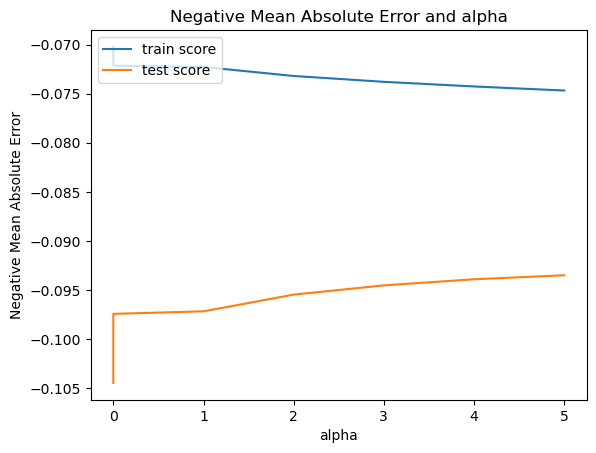

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [120]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01265581, -0.00819314,  0.02605356,  0.07934586,  0.05189845,
        0.00244882, -0.01104289,  0.00625721, -0.00720428,  0.04489246,
        0.04360543,  0.00191651,  0.06935662,  0.0286922 ,  0.00262741,
        0.03231962,  0.01923391,  0.01477135, -0.00962917, -0.00759003,
        0.02926153,  0.00915239,  0.00474155,  0.01127107,  0.00541007,
        0.01220881, -0.01479305, -0.0416116 ,  0.12640792,  0.13486918,
        0.11834022,  0.08181874,  0.02051413, -0.08377421,  0.00498173,
        0.01893782,  0.00375947,  0.01981674,  0.0298215 , -0.04199612,
       -0.04788464, -0.01710604,  0.01146156, -0.06257526, -0.04257107,
       -0.05438805,  0.01931424,  0.04689937, -0.01841705,  0.10166062,
       -0.09780932, -0.01955969, -0.09139348, -0.14735383, -0.03766742,
       -0.01778687,  0.00212009, -0.03730977,  0.07535493,  0.0790854 ,
       -0.04837254,  0.01179961, -0.01324692, -0.00290724,  0.02950117,
        0.10139958,  0.01236958,  0.03662631, -0.00814212,  0.05

In [121]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.719),
 ('MSSubClass', -0.013),
 ('LotFrontage', -0.008),
 ('LotArea', 0.026),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.007),
 ('1stFlrSF', 0.045),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.032),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.015),
 ('PropAge', -0.042),
 ('MSZoning_FV', 0.126),
 ('MSZoning_RH', 0.135),
 ('MSZoning_RL', 0.118),
 ('MSZoning_RM', 0.082),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.084),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.019),
 ('LandContour_Low', 0.004),
 ('LandContour_Lvl', 0.02),
 ('LotConfig_CulDSac', 0.03),
 (

In [122]:

# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9231746076587738
0.875187439616809


In [123]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14038409155245865


It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [124]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [125]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.719
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.104
50,Neighborhood_Crawfor,0.102
66,Neighborhood_StoneBr,0.101
95,Exterior1st_BrkFace,0.100
136,Foundation_Stone,0.100
111,Exterior2nd_CmentBd,0.089


In [126]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.719
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.104
...,...,...
79,BldgType_Twnhs,-0.093
83,HouseStyle_2.5Fin,-0.096
51,Neighborhood_Edwards,-0.098
94,Exterior1st_BrkComm,-0.103


In [127]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.719
30,MSZoning_RH,0.135
29,MSZoning_FV,0.126
31,MSZoning_RL,0.118
205,SaleType_Oth,0.104
...,...,...
79,BldgType_Twnhs,-0.093
83,HouseStyle_2.5Fin,-0.096
51,Neighborhood_Edwards,-0.098
94,Exterior1st_BrkComm,-0.103


In [128]:

predRFE.shape

(207, 2)

Observation:
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.
Equation can be formulated using the features and coefficients obtained by Lasso

In [133]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'X18', 'X19']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.011
x1,OverallQual,0.132
x2,GrLivArea,0.117
x3,OverallCond,0.049
x4,GarageArea,0.045
x5,BsmtFullBath,0.029
x6,Fireplaces,0.026
x7,FullBath,0.022
x8,TotalBsmtSF,0.017
x9,LotArea,0.015


These are the final features that should be selected for predicting the price of house

Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house. <BR><BR>
The higher values of positive coeeficients suggest a high sale value. <BR><BR>
Some of those features are:- <BR><BR>

GrLivArea	- Above grade (ground) living area square feet<BR>
OverallQual	 - Rates the overall material and finish of the house<BR>
OverallCond - Rates the overall condition of the house<BR>
TotalBsmtSF	- Total square feet of basement area <BR>
GarageArea	- Size of garage in square feet <BR><BR>
The higher values of negative coeeficients suggest a decrease in sale value. <BR><BR>
Some of those features are:- <BR><BR>

PropAge - Age of the property at the time of seeling <br>
MSSubClass -	Identifies the type of dwelling involved in the sale <BR><BR>
When the market value of the property is lower than the Predicted Sale Price, its the time to buy.